<a href="https://colab.research.google.com/github/GlenLuiz/IA/blob/master/Plataformas_Trabalho_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configurações

In [70]:
pip install --upgrade azure-cognitiveservices-vision-face

In [71]:
pip install --upgrade "ibm-watson>=5.3.0"


Imports de Pacotes

In [72]:
from IPython.display import display, Javascript
from IPython.display import Image
from google.colab.output import eval_js
from base64 import b64decode

Funções úteis

In [30]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Informações do cliente

In [ ]:
#@title Preencha aqui com as informações do cliente requisitante

#@markdown Informe todos os campos a seguir:
nome = "Glen" #@param {type:"string"}

renda = 6000 #@param {type:"number"}
idade = 22 #@param {type:"slider", min:18, max:100, step:1}
etnia = "Selecionar etnia"  #@param ["Selecionar etnia", "Etnia01", "Etnia02"]
genero = "Masculino" #@param ["Masculino", "Feminino"]
casa_propria = "Sim" #@param ["Selecionar", "Sim", "Não"]
outras_rendas = "Sim" #@param ["Selecionar", "Sim", "Não"]
estado_civil = "Estado01" #@param ["Selecionar", "Estado01", "Estado02"]
escolaridade = 2 #@param {type:"slider", min:0, max:3, step:1}

#@markdown ---


<IPython.core.display.Javascript object>

Saved to photo.jpg


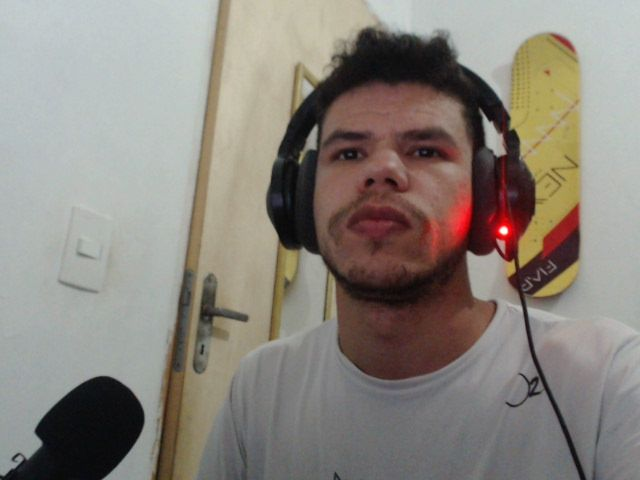

In [73]:
#@title Tire uma foto do cliente requerente (ou tire uma foto sua mesmo)

try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Análise de crédito

1. Verifique se na imagem possui uma pessoa, utilizando a API "default" da IBM; Se não possuir, informar mensagem e não conceder o empréstimo.


2.  Verifique se a imagem apresenta conteúdo explícito , utilizando a API "explicit"da IBM; Se possuir, informar mensagem e não conceder o empréstimo.  


3. Verificar o gênero e a idade da pessoa utilizando a API de reconhecimento facial da Microsoft Azure; Se não for o mesmo gênero ou se a idade diferir em 5 anos (para mais ou para menos), informar mensagem e não conceder o empréstimo.


4. Exibir a imagem novamente no notebook com os pontos "fiduciais" da face da pessoa, obtidos pela API da Azure. (em uma aplicação corporativa, estes pontos ficam gravados para futuras autenticações)


5. Chamar a API de Machine Learning em um contêiner feito em Docker e que esteja rodando em uma máquina virtual no Google Cloud. Esta API deve usar os dados informados neste notebook e **automaticamente** vetar ou conceder o empréstimo.


ATENÇÃO PARA O BULLET 5: É necessário chamar tanto um modelo que possua a variável ETNIA quanto um modelo que não possui esta variável, assim como fizemos em aula!!!


6. Gravar um vídeo "operando" o notebook e simulando a avaliação com concessão ou reprovação do crédito.


7. Submeter o Notebook e o vídeo da plataforma da FIAP, se o vídeo ficar muito grande, submeter ao Youtube (pode ser privado) e anexar o Link.

---  
(Dica: Você pode usar este vídeo para divulgar seu trabalho como Engenheiro de ML)


# IBM WATSON

In [74]:
import requests
import json
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('w1A5-rYXDKvH-hYHZk0ulRlcRYuuDJuK5kJM8WrVXm9e')
visual_recognition = VisualRecognitionV3(
    version='2018-03-19',
    authenticator=authenticator
)

visual_recognition.set_service_url('https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/742a87e4-6844-4973-98f3-f0c3d8ad895b')

with open('./photo.jpg', 'rb') as images_file:
    classes_person = visual_recognition.classify(images_file=images_file,classifier_ids=["explicit", "default"]).get_result()
    print(json.dumps(classes_person, indent=2))


# with open('./photo.jpg', 'rb') as images_file:
#     classes_expl = visual_recognition.classify(images_file=images_file, classifier_ids=["explicit"]).get_result()
#     print(json.dumps(classes, indent=2))

{
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "explicit",
          "name": "explicit",
          "classes": [
            {
              "class": "not explicit",
              "score": 0.985
            }
          ]
        },
        {
          "classifier_id": "default",
          "name": "default",
          "classes": [
            {
              "class": "person",
              "score": 0.61
            },
            {
              "class": "earphone",
              "score": 0.547
            },
            {
              "class": "person with Mohawk haircut",
              "score": 0.5,
              "type_hierarchy": "/person/person with Mohawk haircut"
            },
            {
              "class": "orange color",
              "score": 0.663
            }
          ]
        }
      ],
      "image": "photo.jpg"
    }
  ],
  "images_processed": 1,
  "custom_classes": 0
}


In [75]:
result_json = json.dumps(classes_person, indent=2)

Contem_pessoa = False
Contem_contExp = False


for imagem in classes_person["images"]:
  for classifier in imagem["classifiers"]:
      for image_class in classifier["classes"]:
        if (image_class["class"] == "explicit"):
          Contem_contExp = True
        elif(image_class["class"] == "person" and image_class["score"] > 0.5):
          Contem_pessoa = True
          break

print(Contem_pessoa)
print(Contem_contExp)

True
False


#AZURE

In [76]:
import asyncio
import io
import glob
import os
import sys
import time
import uuid
import requests
from urllib.parse import urlparse
from io import BytesIO
# To install this module, run:
# python -m pip install Pillow
from PIL import Image, ImageDraw
from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.face.models import TrainingStatusType, Person

In [77]:
# This key will serve all examples in this document.
KEY = "7c520083eeca425eafa24b6d3d537163"

# This endpoint will be used in all examples in this quickstart.
ENDPOINT = "https://fiapfaceapi.cognitiveservices.azure.com/"

In [78]:
# Create an authenticated FaceClient.
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))

In [79]:
# Detect a face in an image that contains a single face
single_face_image_url = 'https://raw.githubusercontent.com/Microsoft/Cognitive-Face-Windows/master/Data/detection1.jpg'
single_image_name = os.path.basename(single_face_image_url)
# We use detection model 3 to get better performance.
detected_faces = face_client.face.detect_with_url(url=single_face_image_url, detection_model='detection_03')
if not detected_faces:
    raise Exception('No face detected from image {}'.format(single_image_name))
# Display the detected face ID in the first single-face image.
# Face IDs are used for comparison to faces (their IDs) detected in other images.
print('Detected face ID from', single_image_name, ':')
for face in detected_faces: print (face.face_id)
print()

  # Save this ID for use in Find Similar
first_image_face_ID = detected_faces[0].face_id

Detected face ID from detection1.jpg :
d2f5ace7-a0f4-4665-adbb-1639d399fc40



In [57]:
# Detect a face in an image that contains a single face
single_face_image_url = 'https://raw.githubusercontent.com/Microsoft/Cognitive-Face-Windows/master/Data/detection1.jpg'
single_image_name = os.path.basename(single_face_image_url)
# We use detection model 3 to get better performance.
detected_faces = face_client.face.detect_with_url(url=single_face_image_url, detection_model='detection_03')
if not detected_faces:
    raise Exception('No face detected from image {}'.format(single_image_name))

# Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    
    return ((left, top), (right, bottom))

def drawFaceRectangles() :
# Download the image from the url
    response = requests.get(single_face_image_url)
    img = Image.open(BytesIO(response.content))

# For each face returned use the face rectangle and draw a red box.
    print('Drawing rectangle around face... see popup for results.')
    draw = ImageDraw.Draw(img)
    for face in detected_faces:
        draw.rectangle(getRectangle(face), outline='red')

# Display the image in the default image browser.
    img.show()

# Uncomment this to show the face rectangles.
#    drawFaceRectangles()

In [58]:
# Detect a face in an image that contains a single face
single_face_image_url = './photo.jpg'
single_image_name = os.path.basename(single_face_image_url)
# We use detection model 3 to get better performance.
detected_faces = face_client.face.detect_with_url(url=single_face_image_url, detection_model='detection_03')
if not detected_faces:
    raise Exception('No face detected from image {}'.format(single_image_name))

# Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    
    return ((left, top), (right, bottom))

def drawFaceRectangles() :
# Download the image from the url
    response = requests.get(single_face_image_url)
    img = Image.open(BytesIO(response.content))

# For each face returned use the face rectangle and draw a red box.
    print('Drawing rectangle around face... see popup for results.')
    draw = ImageDraw.Draw(img)
    for face in detected_faces:
        draw.rectangle(getRectangle(face), outline='red')

# Display the image in the default image browser.
    img.show()

# Uncomment this to show the face rectangles.
#    drawFaceRectangles()

APIErrorException: ignored

#GCP

In [63]:
#@title Parâmetros da solução
#@markdown Informe a quantidade de clientes que devem ser analisados.
qtde_clientes = 4  #@param {type: "slider", min: 1, max: 10}

#@markdown Informe o IP do servidor de predição da sua solução:
my_server_ip = "104.197.138.163" #@param {type:"string"}

#@markdown Informe a porta do servidor de predição da sua solução, se nada foi alterado, deve ser 443:
my_server_port = "443" #@param {type:"string"}


#@markdown Ah, e não se esqueça de executar esta célula!


In [64]:
import requests
import pandas as pd
import json

In [66]:
url = "https://us-central1-emf-teacher.cloudfunctions.net/function-aulas-getclient?qtde={0}".format(qtde_clientes)
headers = {'Content-Type': 'application/json'}
response = requests.request("GET", url, headers=headers)
response_content = response.text.encode('utf8').decode()
clientes = pd.read_json(response_content)

In [ ]:
response01 = requests.request("POST", url + "?model=modelo01", headers=headers, data=conteudo)
respostas01 = json.loads(response01.text.encode('utf8').decode())
respostas01

In [67]:
clientes

,nome,renda,idade,etnia,sexo,casapropria,outrasrendas,estadocivil,escolaridade
26359,"Hector, Ortiz",3800.504586,26.671801,0,0,1,0,0,3
42842,"Bertilio, Saenz",3637.305398,56.477735,0,0,1,0,1,0
25168,"Mickey, Krause",4338.784850,28.602609,0,0,0,0,1,2
38637,"Vinh, Turner",3522.595978,41.262133,0,0,0,0,0,2


In [68]:
url = "http://{}:{}/predict".format(my_server_ip, my_server_port)
headers = {'Content-Type': 'application/json'}
conteudo = clientes.to_json()

In [69]:
response01 = requests.request("POST", url + "?model=modelo01", headers=headers, data=conteudo)
respostas01 = json.loads(response01.text.encode('utf8').decode())
respostas01

ConnectionError: ignored

In [ ]:
df_02 = pd.Series(respostas02['prediction'], index = clientes.index, name="PredicaoML02")

In [ ]:
pd.DataFrame(clientes.loc[:,"nome"])\
    .merge(right= df_01, left_index=True, right_index=True)\
    .merge(df_01B, left_index=True, right_index=True)\
    .merge(df_02, left_index=True, right_index=True)